In [1]:
# Imports here | some to be used later
import numpy as np
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# load the json file and verify contents
with open('./data/starwars-episode-4-interactions-allCharacters.json') as f:
    data = json.load(f)

print(data['nodes'][0])
print(data['links'][0])

{'name': 'R2-D2', 'value': 40, 'colour': '#bde0f6'}
{'source': 1, 'target': 0, 'value': 3}


In [3]:
# Generate an undirected graph
sw_ep4_graph = nx.Graph()

#build graph nodes
for node in data['nodes']:
    sw_ep4_graph.add_node(node['name'])
    
#build graph edges
for edge in data['links']:
    sw_ep4_graph.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])

# Print out to verify data
print("Nodes: {}".format(list(sw_ep4_graph)))
print("Number of Nodes: {}".format(sw_ep4_graph.number_of_nodes()))
print("Number of Edges: {}".format(sw_ep4_graph.number_of_edges()))

Nodes: ['R2-D2', 'CHEWBACCA', 'C-3PO', 'LUKE', 'DARTH VADER', 'CAMIE', 'BIGGS', 'LEIA', 'BERU', 'OWEN', 'OBI-WAN', 'MOTTI', 'TARKIN', 'HAN', 'GREEDO', 'JABBA', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN', 'GOLD FIVE']
Number of Nodes: 22
Number of Edges: 60


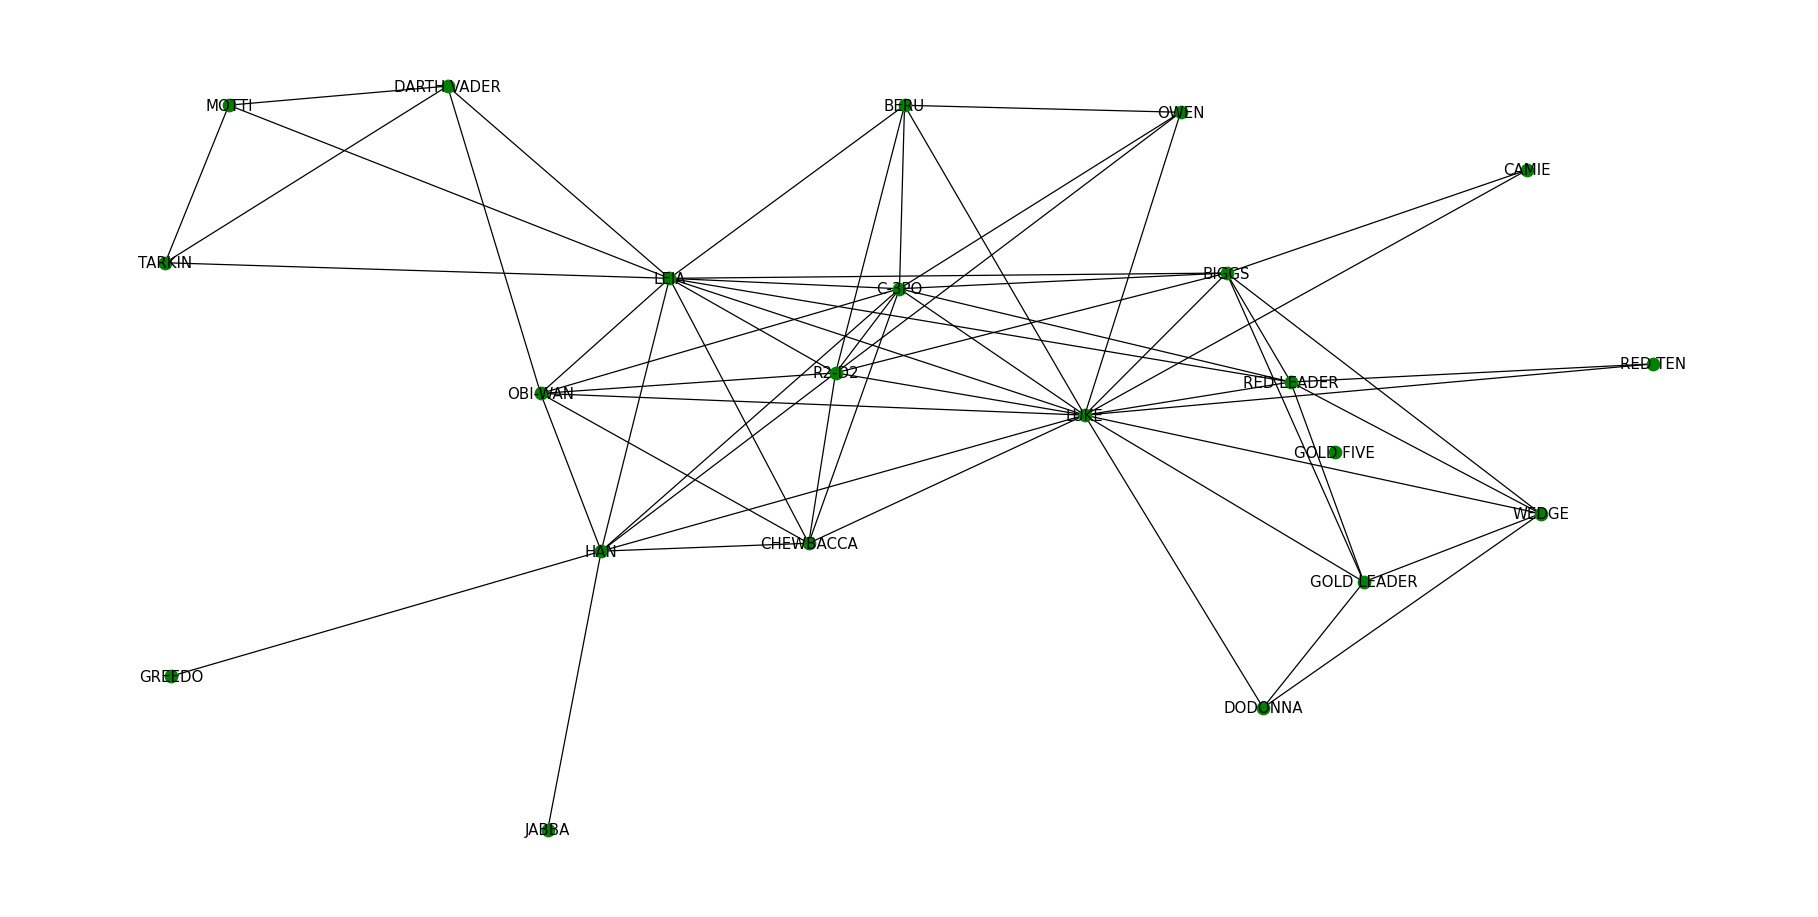

In [4]:
# Visualize the graph connections
options = {
    'node_color': 'green',
    'node_size': 100,
    'width': 1,
    'with_labels': True
}

fig = plt.figure(1, figsize=(20, 10), dpi=90)
nx.draw_kamada_kawai(sw_ep4_graph, **options)

In [5]:
"""
    Simple Graphing function for visualizing Degree and Ranks
"""
def BarGraphData(data: list, title: str, x_label: str, y_lable: str):
    x_val = [x[0] for x in data]
    y_val = [x[1] for x in data]

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    # Set the size
    plt.figure(figsize = (30, 15))
    plt.bar(x_val, y_val)
        
    # calling the function to add value labels
    addlabels(x_val, y_val)
        
    # giving title to the plot
    plt.title(title)

    # giving X and Y labels
    plt.xlabel(x_label)
    plt.ylabel(y_lable)
        
    # visualizing the plot
    plt.show()

15


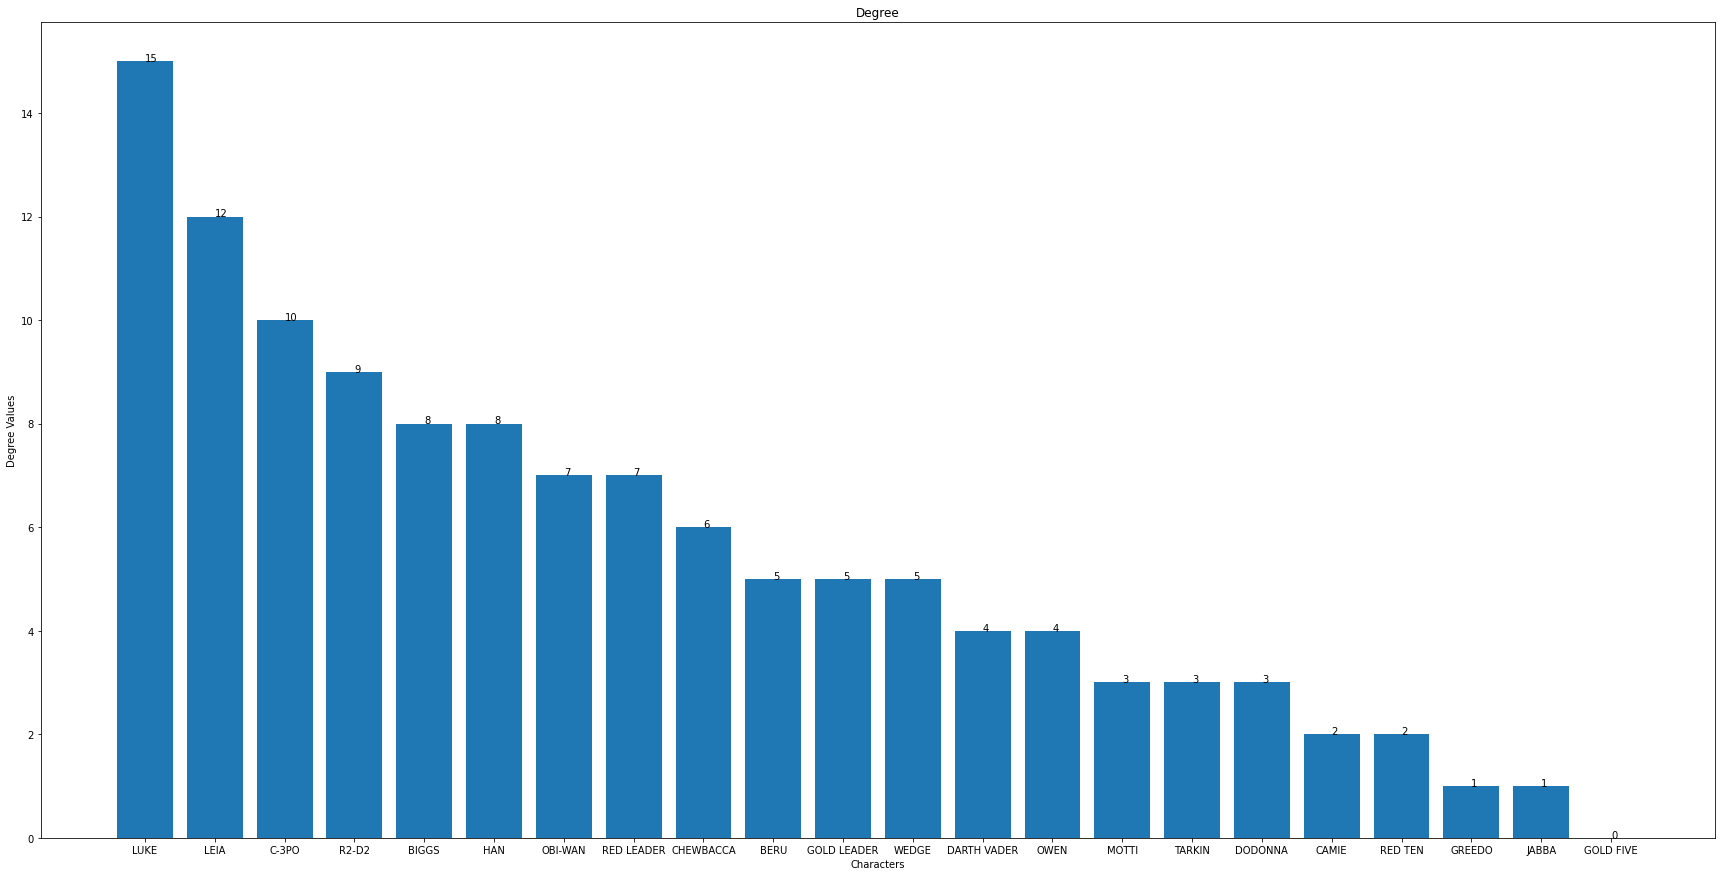

In [6]:
# Degree 
print(sw_ep4_graph.degree["LUKE"])
degree = sorted(sw_ep4_graph.degree, key=lambda x: x[1], reverse=True)

# Lets see it
BarGraphData(degree, "Degree", "Characters", "Degree Values")

0.11395425895074067


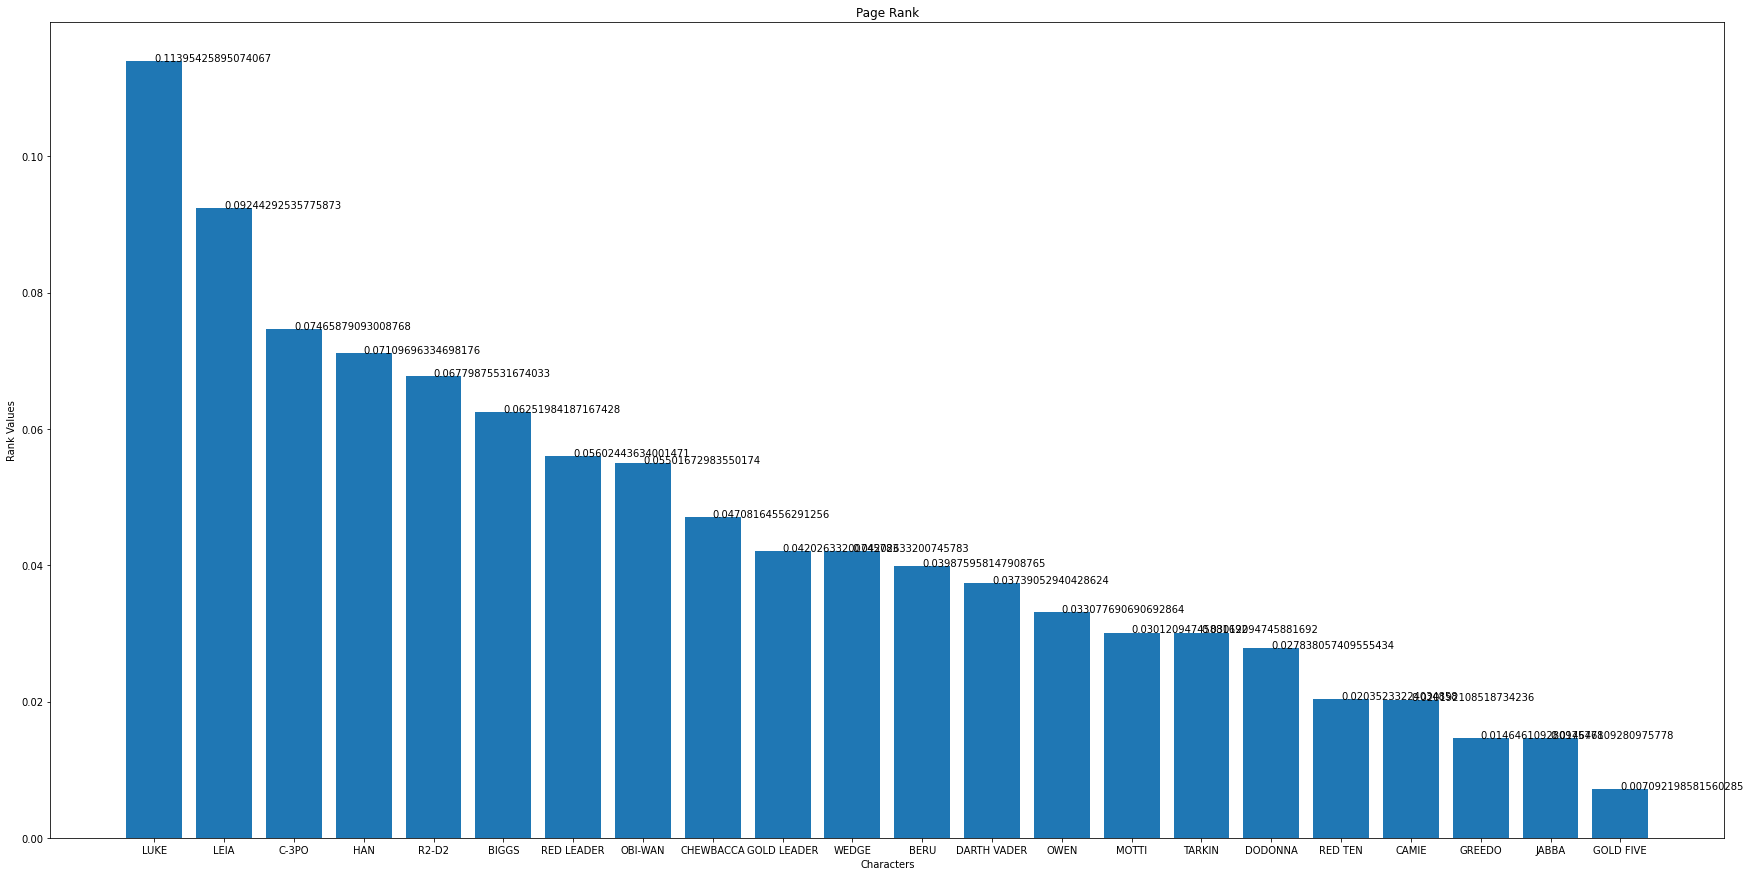

In [7]:
# Page Ranks
page_ranks = nx.pagerank(sw_ep4_graph) # A dictionary
print(page_ranks["LUKE"])
ranks = sorted(page_ranks.items(), key=lambda x: x[1], reverse=True)

# Lets see it
BarGraphData(ranks, "Page Rank", "Characters", "Rank Values")